In [87]:
import pandas as pd

system=pd.read_csv(r'C:\Users\W R VARUN\Downloads\9e5938fc2ce611eb\train.csv')
system_test=pd.read_csv(r'C:\Users\W R VARUN\Downloads\9e5938fc2ce611eb\test.csv')
system_test

customer_id  customer_visit_score  customer_product_search_score  \
0     csid_10739             22.500174                       3.702145   
1     csid_10740             13.225950                       3.600102   
2     csid_10741             14.603376                       5.084047   
3     csid_10742             26.149905                       3.025501   
4     csid_10743             19.810630                       5.020400   
...          ...                   ...                            ...   
7155  csid_17894             18.164300                       7.240835   
7156  csid_17895             25.363705                       4.881059   
7157  csid_17896             11.160720                       5.019859   
7158  csid_17897             17.140020                       9.269037   
7159  csid_17898             10.698835                      12.173331   

      customer_ctr_score  customer_stay_score  customer_frequency_score  \
0               0.118811             0.093253                  0.689237   
1               0.130985             0.053575                  0.142756   
2              -0.004651            -0.036299                  0.333709   
3               0.229740             0.204591                  3.768405   
4              -0.011347            -0.028780                  0.286841   
...                  ...                  ...                       ...   
7155           -0.056238            -0.177289                  0.336608   
7156            0.038720             0.054397                  2.452571   
7157            0.053864            -0.102337                  4.968183   
7158            0.059911            -0.004299                  0.357399   
7159            0.475469             0.014124                 23.358252   

      customer_product_variation_score  customer_order_score  \
0                             5.786842              3.748009   
1                             3.940359              3.469659   
2                             4.254662              3.855939   
3                             6.942625              2.362421   
4                             4.585513              3.278624   
...                                ...                   ...   
7155                          4.043067              4.758199   
7156                          7.582251              1.823892   
7157                          8.585355              2.422193   
7158                          4.193971              3.715392   
7159                         10.805826              1.571717   

      customer_affinity_score customer_active_segment  X1  
0                    7.661716                       B  BA  
1                   33.999679                       B  AA  
2                   33.485630                       B  AA  
3                    0.795372                       B  BA  
4                   15.052058                       C  BA  
...                       ...                     ...  ..  
7155                68.052717                       C  AA  
7156                 2.080245                       C  BA  
7157                 0.616082                       C  BA  
7158                26.939493                       C  BA  
7159                 0.133973                       B  BA  

[7160 rows x 11 columns]

In [2]:
import pandas_profiling

profile=system.profile_report()
profile

In [3]:
df=system.copy()
df.isnull().sum()

customer_id                          0
customer_visit_score                 0
customer_product_search_score       42
customer_ctr_score                   0
customer_stay_score                 37
customer_frequency_score             0
customer_product_variation_score    46
customer_order_score                66
customer_affinity_score              0
customer_active_segment             23
X1                                  37
customer_category                    0
dtype: int64

In [4]:

binint=[0,10,20,30,40,50]
lab=[0,10,20,30,40]
df['vists']=pd.cut(df['customer_visit_score'],bins=binint,labels=lab)

binse=[0,1,2,3,4,5,6,7,8,9,10]
labse=[0,1,2,3,4,5,6,7,8,9]
df['search']=pd.cut(df['customer_product_search_score'],bins=binse,labels=labse)

binst=[-0.4,-0.3,-0.2,-0.1,0.1,0.2,0.3,0.4]
labst=[-3,-2,-1,0,1,2,3]
df['stay']=pd.cut(df['customer_stay_score'],bins=binst,labels=labst)

binfr=[0,0.2,0.4,0.6,0.8,1.2,1.4]
labfr=[1,2,3,4,5,6]
df['frequency']=pd.cut(df['customer_frequency_score'],bins=binfr,labels=labfr)

binvar=[0,1,2,3,4,5,6]
labvar=[0,1,2,3,4,5]
df['variation']=pd.cut(df['customer_product_variation_score'],bins=binvar,labels=labvar)

df=df.iloc[:,[-1,-2,-3,-4,-5,-6]]
df

variation frequency stay search vists  customer_category
0             4         3   -1      9    10                  0
1             4         2   -1      7    10                  0
2             4         3    2      5    10                  0
3             5         4   -1      4    30                  0
4             3         1    1      4    10                  0
...         ...       ...  ...    ...   ...                ...
10733       NaN         6    0      6    20                  0
10734         5         4    0      6    20                  0
10735         5         2    0      7    30                  0
10736         3         1    0      5    20                  0
10737         4         3    3      4    20                  0

[10738 rows x 6 columns]

In [5]:
df=df.dropna(axis=0)
df.isnull().sum()
df

variation frequency stay search vists  customer_category
0             4         3   -1      9    10                  0
1             4         2   -1      7    10                  0
2             4         3    2      5    10                  0
3             5         4   -1      4    30                  0
4             3         1    1      4    10                  0
...         ...       ...  ...    ...   ...                ...
10732         4         2   -1      5    10                  0
10734         5         4    0      6    20                  0
10735         5         2    0      7    30                  0
10736         3         1    0      5    20                  0
10737         4         3    3      4    20                  0

[7055 rows x 6 columns]

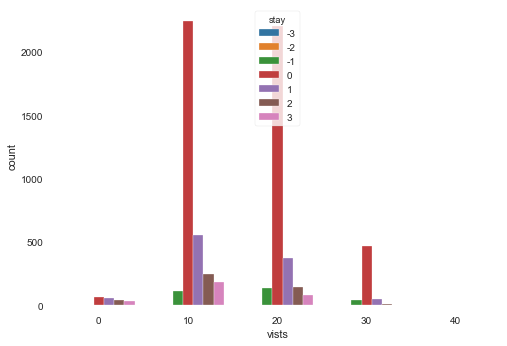

In [7]:
# how regulary customer visits website annd for how much time he will stay
import seaborn as sns
sns.countplot(df['vists'],hue=df['stay'])

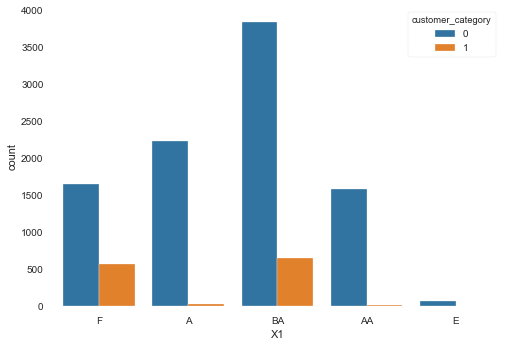

In [8]:
#customer category hoq much they are loyal
sns.countplot(system['X1'],hue=system['customer_category'])

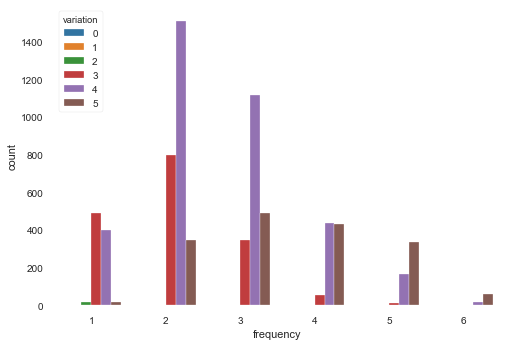

In [9]:
#how customers are frequent based on what variation score
sns.countplot(df['frequency'],hue=df['variation'])

## Notes from EDA

### 1)Their is no duplicates rows or columns present

### 2)Missing values presnt in columns:
    a)'customer_product_search_score'
    b)'customer_stay_score'
    c)'customer_product_variation score'
    d)'customer_order_score'
    e)'customer_active_segment'
    f)'X1'
### 3)Correlated features:
    a)'customer_stay_score' and 'customer_ctr_score'
### 4)Skewness:
    All the beloq features are positively skewed with value greater than 1
        a)'customer_ctr_score'
        b)'customer_stay_score'
        c)'customer_freq_score'
        d)'customer_product_variation score'
### 5)Outliers are present   

In [367]:
profile.to_file('EDA.html')

In [15]:
system.info()
system_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10738 entries, 0 to 10737
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   customer_id                       10738 non-null  object 
 1   customer_visit_score              10738 non-null  float64
 2   customer_product_search_score     10696 non-null  float64
 3   customer_ctr_score                10738 non-null  float64
 4   customer_stay_score               10701 non-null  float64
 5   customer_frequency_score          10738 non-null  float64
 6   customer_product_variation_score  10692 non-null  float64
 7   customer_order_score              10672 non-null  float64
 8   customer_affinity_score           10738 non-null  float64
 9   customer_active_segment           10715 non-null  object 
 10  X1                                10701 non-null  object 
 11  customer_category                 10738 non-null  int64  
dtypes: f

In [88]:
Y=system['customer_category']

system=system.drop(['customer_id','customer_category','customer_ctr_score','customer_order_score'],axis=1)
system_new=system_test.iloc[:,0]
system_test=system_test.drop(['customer_id','customer_ctr_score','customer_order_score'],axis=1)
system_new

0       csid_10739
1       csid_10740
2       csid_10741
3       csid_10742
4       csid_10743
           ...    
7155    csid_17894
7156    csid_17895
7157    csid_17896
7158    csid_17897
7159    csid_17898
Name: customer_id, Length: 7160, dtype: object

In [89]:
#Removing outliers value but not deleting the row
def outliers(system):
    Q1=system.quantile(0.25)       
    #print(Q1)
    Q3=system.quantile(0.75)
    #print(Q3)
    IQR=Q3-Q1
    #print(Q1,Q3,IQR)
    system=system[~((system<(Q1-1.5*IQR)) | (system>(Q3+1.5*IQR)))]
    return system

system=outliers(system)
system_test=outliers(system_test)
system

customer_visit_score  customer_product_search_score  \
0                 13.168425                       9.447662   
1                 17.092979                       7.329056   
2                 17.505334                       5.143676   
3                 31.423381                       4.917740   
4                 11.909502                       4.237073   
...                     ...                            ...   
10733             23.672615                       6.701514   
10734             25.673028                       6.497796   
10735             31.676844                       7.799880   
10736             28.441780                       5.588302   
10737             20.663035                       4.478301   

       customer_stay_score  customer_frequency_score  \
0                -0.139541                  0.436956   
1                -0.102726                  0.380340   
2                 0.262834                  0.417648   
3                -0.100526                  0.778130   
4                 0.172891                  0.162067   
...                    ...                       ...   
10733            -0.017332                  1.210397   
10734            -0.047211                  0.725230   
10735            -0.032765                  0.318118   
10736             0.081586                  0.132177   
10737             0.381349                  0.504904   

       customer_product_variation_score  customer_affinity_score  \
0                              4.705761                 7.959503   
1                              4.205138                17.517381   
2                              4.479070                12.595155   
3                              5.055535                 4.795073   
4                              3.445247                      NaN   
...                                 ...                      ...   
10733                          7.003663                 1.952911   
10734                          5.407507                 5.124286   
10735                          5.598486                21.864188   
10736                          3.616492                      NaN   
10737                          4.181092                27.770899   

      customer_active_segment  X1  
0                           C   F  
1                           C   A  
2                           C  BA  
3                          AA   F  
4                           C  AA  
...                       ...  ..  
10733                       C  BA  
10734                       C  BA  
10735                       A  BA  
10736                       B  AA  
10737                       B   A  

[10738 rows x 8 columns]

In [30]:
system_test['customer_active_segment'].value_counts()

C     3251
B     3127
AA     321
A      249
D      200
Name: customer_active_segment, dtype: int64

In [90]:
def categoric(system):
    x1_new={'F':1,'E':2,"BA":3,'A':4,'AA':5}
    active_new={'D':1,'C':2,'B':3,'A':4,'AA':5}
    
    system['X1_New']=system['X1'].map(x1_new)
    system['Active_New']=system['customer_active_segment'].map(active_new)
    
    system=system.drop(['customer_active_segment','X1'],axis=1)
    
    return system

system=categoric(system)
system_test=categoric(system_test)
system

customer_visit_score  customer_product_search_score  \
0                 13.168425                       9.447662   
1                 17.092979                       7.329056   
2                 17.505334                       5.143676   
3                 31.423381                       4.917740   
4                 11.909502                       4.237073   
...                     ...                            ...   
10733             23.672615                       6.701514   
10734             25.673028                       6.497796   
10735             31.676844                       7.799880   
10736             28.441780                       5.588302   
10737             20.663035                       4.478301   

       customer_stay_score  customer_frequency_score  \
0                -0.139541                  0.436956   
1                -0.102726                  0.380340   
2                 0.262834                  0.417648   
3                -0.100526                  0.778130   
4                 0.172891                  0.162067   
...                    ...                       ...   
10733            -0.017332                  1.210397   
10734            -0.047211                  0.725230   
10735            -0.032765                  0.318118   
10736             0.081586                  0.132177   
10737             0.381349                  0.504904   

       customer_product_variation_score  customer_affinity_score  X1_New  \
0                              4.705761                 7.959503     1.0   
1                              4.205138                17.517381     4.0   
2                              4.479070                12.595155     3.0   
3                              5.055535                 4.795073     1.0   
4                              3.445247                      NaN     5.0   
...                                 ...                      ...     ...   
10733                          7.003663                 1.952911     3.0   
10734                          5.407507                 5.124286     3.0   
10735                          5.598486                21.864188     3.0   
10736                          3.616492                      NaN     5.0   
10737                          4.181092                27.770899     4.0   

       Active_New  
0             2.0  
1             2.0  
2             2.0  
3             5.0  
4             2.0  
...           ...  
10733         2.0  
10734         2.0  
10735         4.0  
10736         3.0  
10737         3.0  

[10738 rows x 8 columns]

In [91]:
def null(system):
    for i in system.columns:
        if ((system[i].isnull().sum()/system[i].shape[0])*100)<8.0:
            system[i].fillna(system[i].median(),inplace=True)
        else:
            system[i].fillna(system[i].mean(),inplace=True)    
    return system
system=null(system)
system_test=null(system_test)

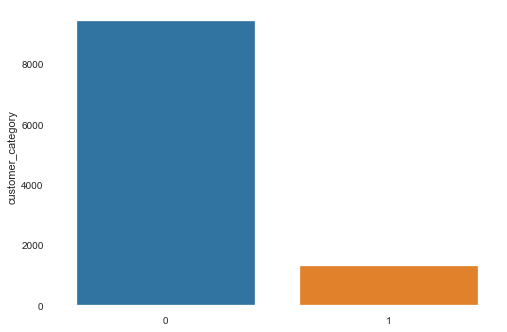

In [36]:
sns.barplot(x=Y.value_counts().index,y=Y.value_counts())

In [76]:
X=system.copy()

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3)

print(y_train.value_counts(),y_test.value_counts())

scale=StandardScaler()
xtrain_scaled=scale.fit_transform(x_train)
xtest_scaled=scale.transform(x_test)
#print(y_train.unique())
system_scaled_test=scale.transform(system_test)

0    6600
1     916
Name: customer_category, dtype: int64 0    2843
1     379
Name: customer_category, dtype: int64


In [93]:
# As the data is imbalanced we need to balance it.

from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

smot=SMOTE(random_state=10)
x_reshape_train,y_reshape_train=smot.fit_sample(xtrain_scaled,y_train)
y_reshape_train.value_counts()

1    6600
0    6600
Name: customer_category, dtype: int64

In [383]:
import optuna
import xgboost
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


def objective(trial):
    
    classifier_name=trial.suggest_categorical('classifier',['Logistic','SVC','RandomForest','XGBoost','GaussianNaive'])
    
    if classifier_name=='Logistic':
        pen=trial.suggest_categorical('penal',{'l1', 'l2'})
        c_val=trial.suggest_int('C_v',1,100)
        solve=trial.suggest_categorical('sol',{'newton-cg', 'liblinear', 'sag', 'saga'})
        
        classifier_obj=LogisticRegression(penalty=pen,C=c_val,solver=solve)
        
    elif classifier_name=='SVC':
        
        c_vals=trial.suggest_int('C_v',1,100)
        ker=trial.suggest_categorical('k',{'linear', 'poly', 'rbf', 'sigmoid'})
        gam=trial.suggest_categorical('g',{'scale','auto'})
        
        classifier_obj=SVC(C=c_vals,kernel=ker,gamma=gam)
        
    elif classifier_name=='RandomForest':
        
        estimator=trial.suggest_int('est',50,500)
        depths=trial.suggest_int('maxdepths',1,15,log=True)
        crite=trial.suggest_categorical('crit',{'gini', 'entropy'})
        leaf=trial.suggest_int('le',1,20)
        
        classifier_obj=RandomForestClassifier(n_estimators=estimator,max_depth=depths,criterion=crite,min_samples_leaf=leaf)
        
    elif classifier_name=='XGBoost':
                
        esti=trial.suggest_int('est',50,500)
        depth=trial.suggest_int('maxdepth',5,40)
        min_child=trial.suggest_int('min_weight',0,20)
        rate=trial.suggest_float('learning',0.01,0.1)
        gams=trial.suggest_float('ga',0,5)
        sample=trial.suggest_float('subsamples',0,0.9)
        colsample=trial.suggest_float('cols',0,0.9)
        alpha=trial.suggest_float('alphas',0.001,10)
        boost=trial.suggest_categorical('boo',{'gbtree','gblinear'})
        
        
        
        classifier_obj=xgboost.XGBClassifier(n_estimators=esti,max_depth=depth,learning_rate=rate,gamma=gams,subsample=sample,
                                             colsample_bytree=colsample,reg_alpha=alpha,booster=boost)
        
    elif classifier_name=='GaussianNaive':
        
        classifier_obj=GaussianNB()
        
    
    return cross_val_score(classifier_obj,x_reshape_train,y_reshape_train,cv=3).mean()
    
    
    
    
study=optuna.create_study(direction='maximize')
study.optimize(objective,n_trials=30)

trials=study.best_trial

print(trials.value)
print(trials.params)

[21:22:43] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { colsample_bytree, gamma, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:22:45] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { colsample_bytree, gamma, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:22:45] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { colsample_bytree, gamma, max_depth, su

[I 2020-12-06 21:22:46,020] Trial 0 finished with value: 0.5 and parameters: {'classifier': 'XGBoost', 'est': 232, 'maxdepth': 39, 'min_weight': 14, 'learning': 0.032927255042216136, 'ga': 3.9314428794216525, 'subsamples': 0.47220913753541777, 'cols': 0.19225454507060086, 'alphas': 7.673666796695702, 'boo': 'gblinear'}. Best is trial 0 with value: 0.5.
[I 2020-12-06 21:22:51,400] Trial 1 finished with value: 0.9213993639254884 and parameters: {'classifier': 'RandomForest', 'est': 98, 'maxdepths': 4, 'crit': 'gini', 'le': 8}. Best is trial 1 with value: 0.9213993639254884.
[I 2020-12-06 21:23:51,783] Trial 2 finished with value: 0.9107981220657276 and parameters: {'classifier': 'SVC', 'C_v': 64, 'k': 'linear', 'g': 'auto'}. Best is trial 1 with value: 0.9213993639254884.
[I 2020-12-06 21:23:54,024] Trial 3 finished with value: 0.9106466757534454 and parameters: {'classifier': 'Logistic', 'penal': 'l2', 'C_v': 81, 'sol': 'saga'}. Best is trial 1 with value: 0.9213993639254884.
[I 2020-12

[21:24:00] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { colsample_bytree, gamma, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:24:01] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { colsample_bytree, gamma, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:24:01] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { colsample_bytree, gamma, max_depth, su

[I 2020-12-06 21:24:02,154] Trial 5 finished with value: 0.5 and parameters: {'classifier': 'XGBoost', 'est': 229, 'maxdepth': 16, 'min_weight': 4, 'learning': 0.0926586898394193, 'ga': 0.21582120981811226, 'subsamples': 0.5509729406403114, 'cols': 0.49472811591272436, 'alphas': 5.303561453317962, 'boo': 'gblinear'}. Best is trial 1 with value: 0.9213993639254884.
[I 2020-12-06 21:24:44,778] Trial 6 finished with value: 0.9107981220657276 and parameters: {'classifier': 'SVC', 'C_v': 65, 'k': 'linear', 'g': 'auto'}. Best is trial 1 with value: 0.9213993639254884.
[I 2020-12-06 21:24:45,236] Trial 7 finished with value: 0.8820990458882326 and parameters: {'classifier': 'GaussianNaive'}. Best is trial 1 with value: 0.9213993639254884.
[I 2020-12-06 21:24:45,282] Trial 8 finished with value: 0.8820990458882326 and parameters: {'classifier': 'GaussianNaive'}. Best is trial 1 with value: 0.9213993639254884.
[I 2020-12-06 21:24:46,075] Trial 9 finished with value: 0.9106466757534454 and param

0.9535059821293351
{'classifier': 'RandomForest', 'est': 395, 'maxdepths': 15, 'crit': 'entropy', 'le': 2}


In [94]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

#on hyperparameter optimaization and tuning 

forest=RandomForestClassifier(n_estimators=395,max_depth=15,criterion='entropy',min_samples_leaf=2).fit(x_reshape_train,y_reshape_train)

x_train_forest=forest.predict(x_reshape_train)
forest_prednew=forest.predict(xtest_scaled)

report_train_bal_forest=classification_report(x_train_forest,y_reshape_train)
print(report_train_bal_forest)	

report_test_forest=classification_report(forest_prednew,y_test)
print(report_test_forest)

system_test_predict=forest.predict(system_scaled_test)
system_test_predict

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      6559
           1       0.99      0.99      0.99      6641

    accuracy                           0.99     13200
   macro avg       0.99      0.99      0.99     13200
weighted avg       0.99      0.99      0.99     13200

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      2818
           1       0.82      0.77      0.79       404

    accuracy                           0.95      3222
   macro avg       0.89      0.87      0.88      3222
weighted avg       0.95      0.95      0.95      3222



array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [80]:
y_test.value_counts()

0    2832
1     390
Name: customer_category, dtype: int64

In [95]:
from collections import Counter

Counter(system_test_predict)

Counter({0: 6744, 1: 416})

In [96]:
from sklearn.metrics import precision_score
score_train=precision_score(y_reshape_train,x_train_forest,average='macro')
score_test=precision_score(y_test,forest_prednew,average='macro')
print('Scores of trais is {} and test is {}'.format(score_train,score_test))

Scores of trais is 0.9917614015361795 and test is 0.8728356955638786


In [97]:
#system_new['customer_category']=system_test_predict
system_new

0       csid_10739
1       csid_10740
2       csid_10741
3       csid_10742
4       csid_10743
           ...    
7155    csid_17894
7156    csid_17895
7157    csid_17896
7158    csid_17897
7159    csid_17898
Name: customer_id, Length: 7160, dtype: object

In [100]:
new=pd.Series(system_test_predict,name='customer_category')
n

0       0
1       0
2       0
3       1
4       0
       ..
7155    0
7156    0
7157    0
7158    0
7159    0
Name: customer_category, Length: 7160, dtype: int64

In [101]:
new_test=pd.concat([system_new,new],axis=1)
new_test

customer_id  customer_category
0     csid_10739                  0
1     csid_10740                  0
2     csid_10741                  0
3     csid_10742                  1
4     csid_10743                  0
...          ...                ...
7155  csid_17894                  0
7156  csid_17895                  0
7157  csid_17896                  0
7158  csid_17897                  0
7159  csid_17898                  0

[7160 rows x 2 columns]

In [102]:
new_test.to_csv('amazon.csv')